In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set(style='ticks', context='talk', font_scale=0.8)
sns.set_palette('deep')
plt.figure(figsize=(9,6))
from scipy import stats
!pip install pandas.profiling --quiet
import pandas_profiling as pp 
!pip install -q shap --quiet
import shap
shap.initjs()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
!pip install -q category_encoders
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
!pip install --upgrade scikit-learn==1.2.0 --quiet
import phik
from phik import resources, report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
def countplot_(data, col,title):
    counts = data[col].value_counts()
    sns.set_style('darkgrid')
    plt.figure(figsize=(7,7))
    ax = sns.countplot(y=data[col],
                      order = counts.index,
                      lw=1,
                      edgecolor = sns.color_palette('Greys',3)
                      )
    for x,y in enumerate(counts):
        ax.text(0.7, x,y,weight='bold', fontsize=9.5)
        plt.title(title,fontsize=12)

 ### 1. Data/Domain Understanding and Exploration

### 1.1. Meaning and Type of Features; Analysis of UnivariateDistributions 

 ##### Meaning and Type of Features

- Mileage(Number): The number of miles travelled or covered by the Vehicle.
- Standard Colour(String):The color of the Vehicle.
- Standard Make(String): The make or brand of the Vehicle.
- Standard Model(String): The specific version of a car that is produced by the manufacturer.
- Vehicle Ccondition(String): Refers to the overall condition of the car and is often used to describe the quality of the vehicle and it is used for determining the price of the car.
- Price(Numeric): The price of the Vehicle refers to the monetary value of a car.
- Body Type(String): The body type of a vehicle refers to the physical design and layout of the car. It describes the shape and style of the car, as well as its purpose and intended use.
- Fuel Type(String): The fuel type of a vehicle refers to the type of fuel that is used to power the car's engine.In this column we have Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid' etc..
- Reg-code(String): This the age identifier. It is the code assigned to the year the vehicle is registered

#### Analysis of Univariate Distributions

#### Importing the Data

In [5]:
adverts = pd.read_csv('/Users/macbook/Downloads/adverts.csv')

###### PRICE

In [6]:
adverts.price.describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

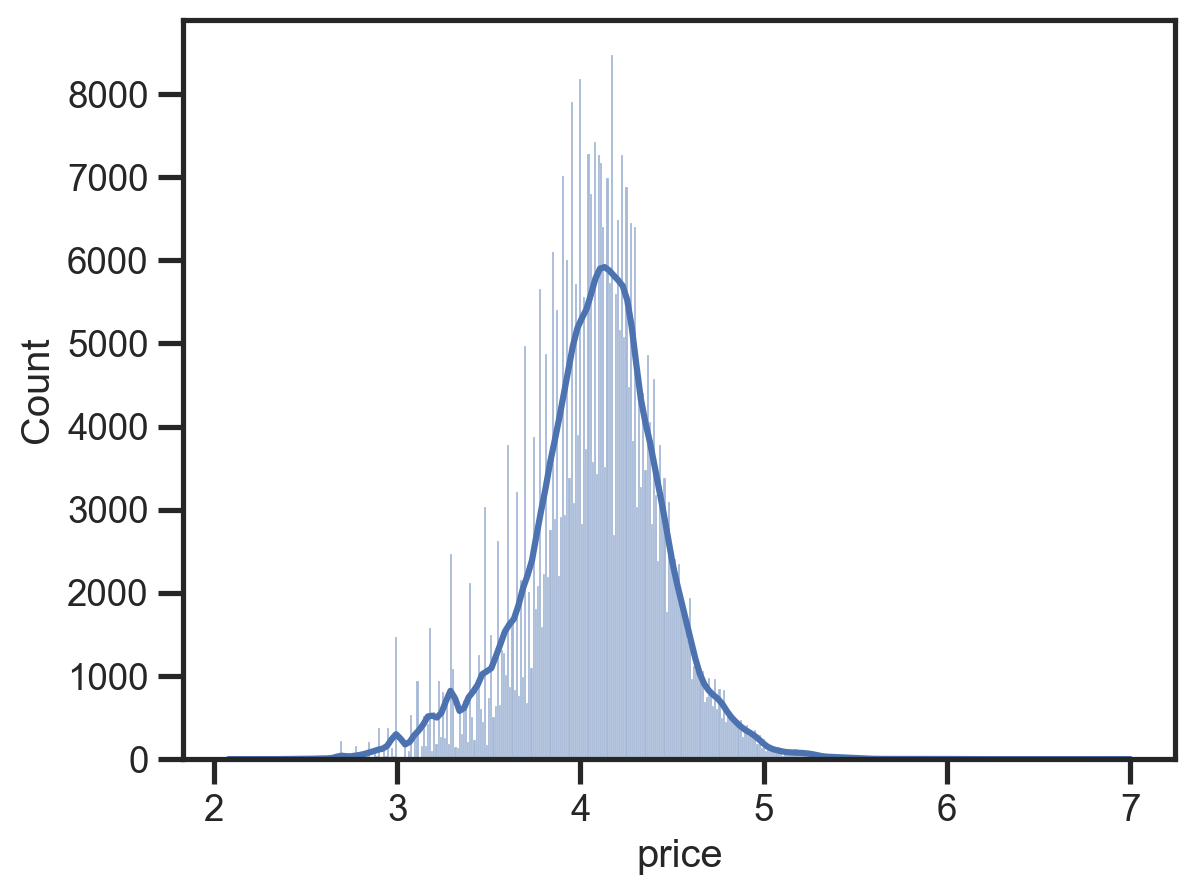

In [7]:
sns.histplot(np.log10(adverts.price), kde=True);

<AxesSubplot:xlabel='price'>

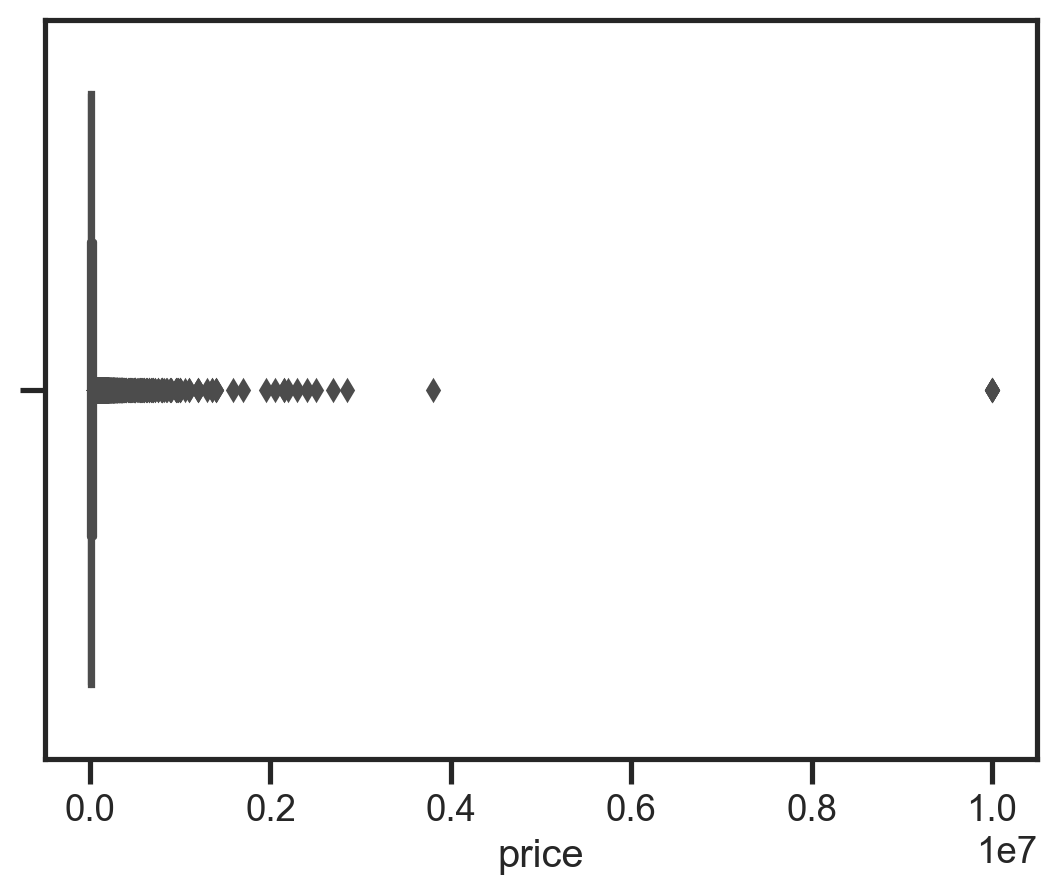

In [8]:
sns.boxplot(x = (adverts['price']))

This shows that price is normally distributed and majority of it are within the range 1,000 to 100,000.
The data set contains 402005 records, and the variable in question has a mean value of 17341.97, a standard deviation of 46437.40, and a minimum value of 120. This suggests that the variable is continuous and has a relatively wide range of values. The 25th percentile, or the value below which 25% of the data falls, is 7495, while the 50th percentile, or the value below which 50% of the data falls, is 12600. The 75th percentile, or the value below which 75% of the data falls, is 20000. The maximum value in the data set is 9999999.

##### Vehicle Conditions

In [9]:
adverts.vehicle_condition.value_counts(normalize=True)

USED    0.922267
NEW     0.077733
Name: vehicle_condition, dtype: float64

In [10]:
adverts.vehicle_condition.describe()

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object

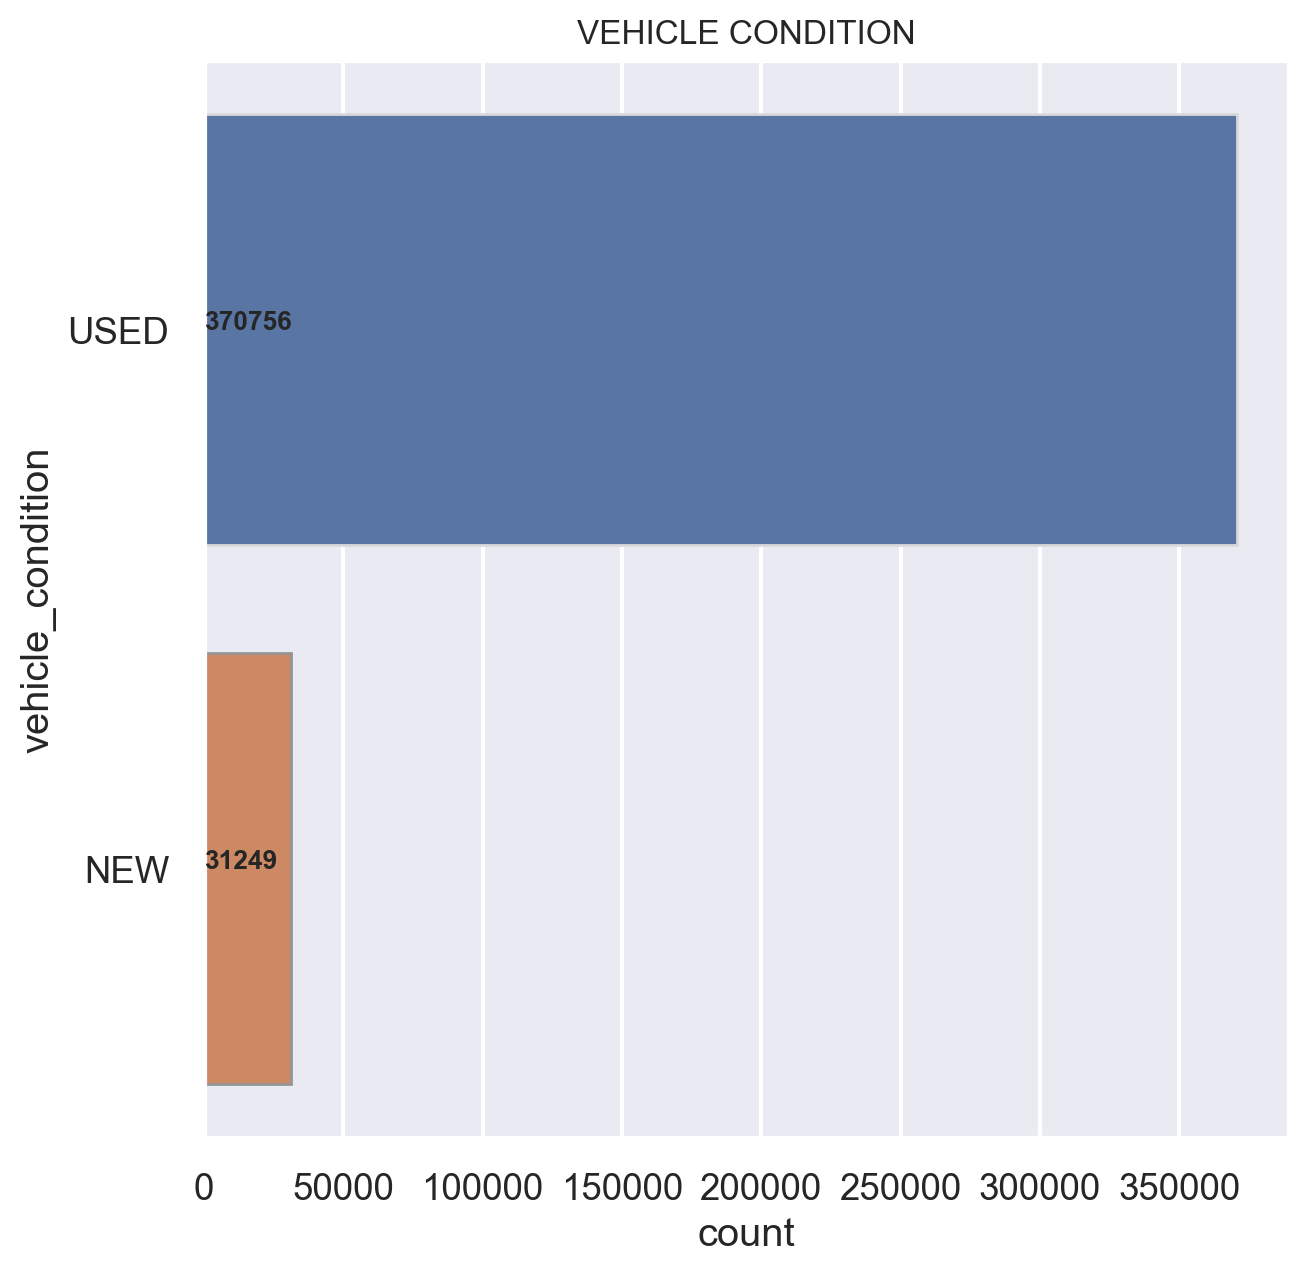

In [11]:
countplot_(adverts, 'vehicle_condition', "VEHICLE CONDITION") 

There are a total of 402005 vehicles in the dataset, and 2 unique categories of vehicles represented: "used" and "new." Of these vehicles, approximately 92.23% (370756) are used, while approximately 7.77% (30249) are new. This means that the majority of the vehicles in the dataset are used, rather than brand new. The specific conditions of the used vehicles will depend on a variety of factors, such as the age of the vehicle, the number of miles it has been driven, and how well it has been maintained. It is also worth noting that the "used" category is the most frequent, or most common, category among the vehicles in the dataset.

#### Standard Make

In [12]:
adverts.standard_make.value_counts(normalize=True).head()

BMW              0.092974
Audi             0.087760
Volkswagen       0.085188
Vauxhall         0.083830
Mercedes-Benz    0.079395
Name: standard_make, dtype: float64

In [13]:
adverts.standard_make.describe()

count     402005
unique       110
top          BMW
freq       37376
Name: standard_make, dtype: object

<AxesSubplot:xlabel='standard_make'>

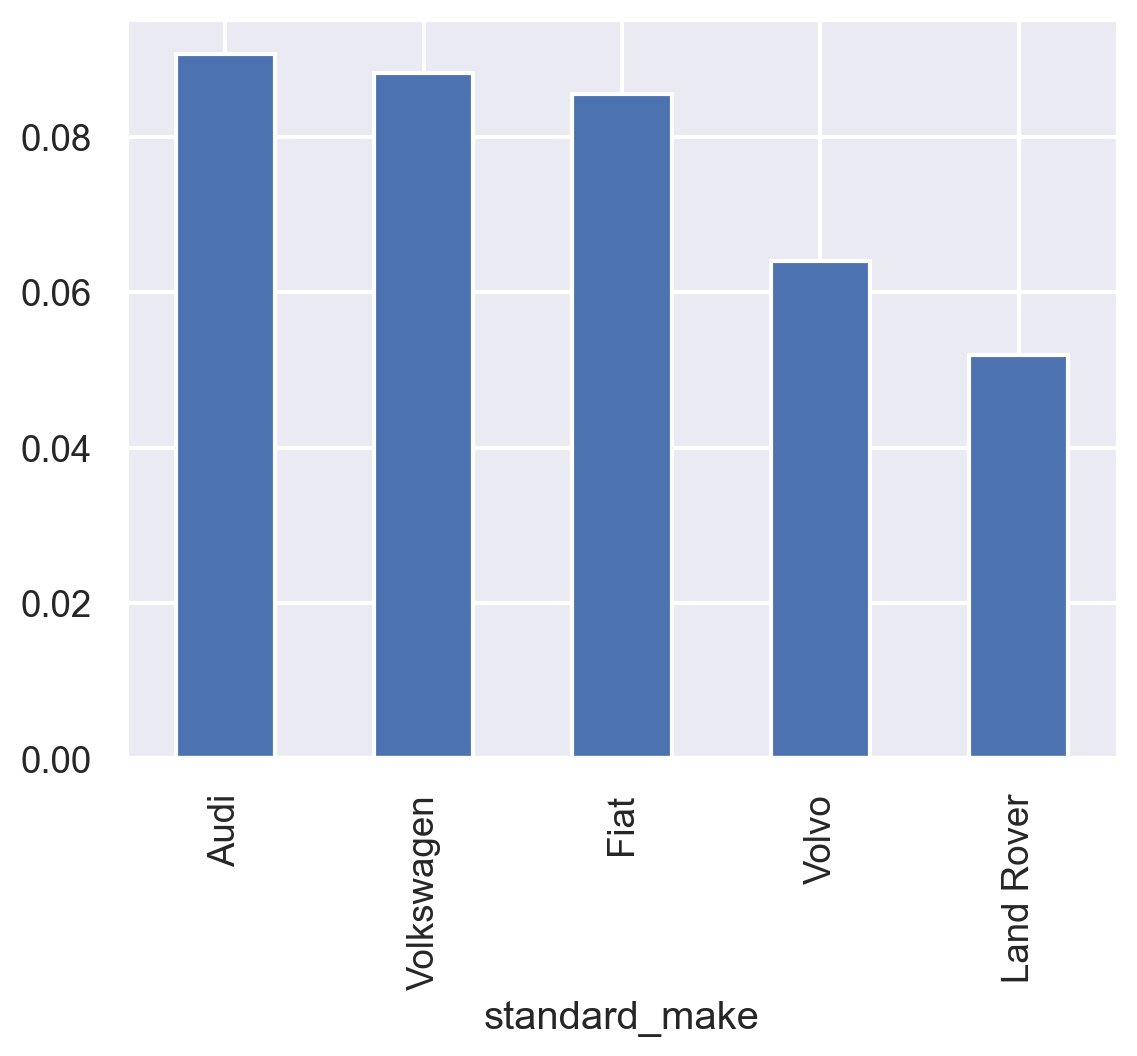

In [14]:
adverts.groupby('vehicle_condition').standard_make.value_counts(normalize=True).NEW.head().plot.bar()

<AxesSubplot:xlabel='standard_make'>

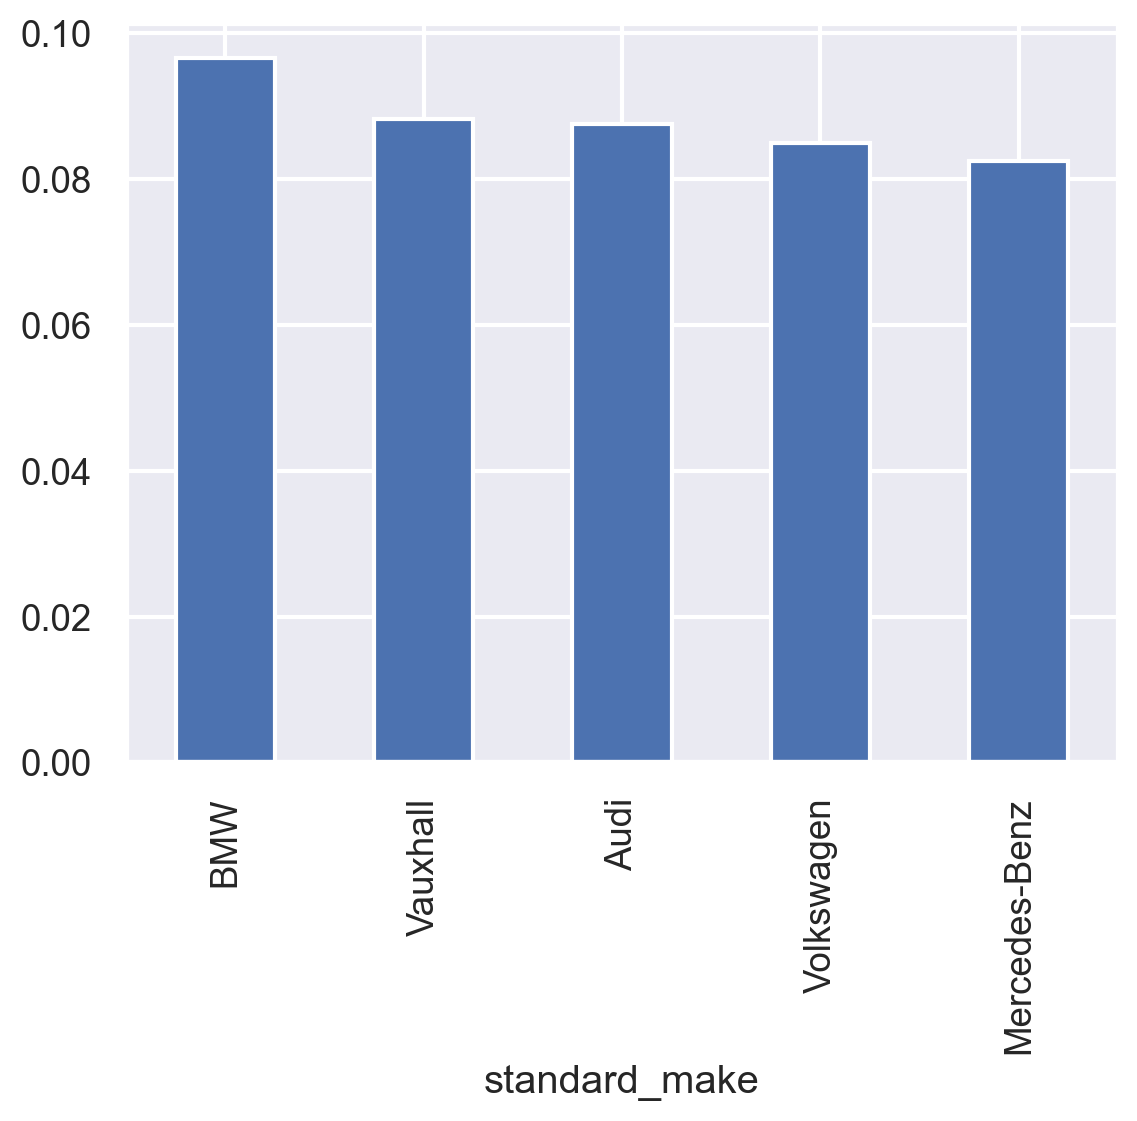

In [15]:
adverts.groupby('vehicle_condition').standard_make.value_counts(normalize=True).USED.head().plot.bar()

The barplot above shows the top 5 standard makes in both new and used vehicles. This was made possible by grouping the data by the vehicle condition. This shows the frequency of the standard makes grouped by the vehicle conditions.
The standard make of the vehicles in the dataset is a categorical variable with 110 unique categories. Of these categories, the most common is "BMW," with a frequency of 37376, or approximately 9.30% of the total vehicles in the dataset. Other common categories include "Audi," "Volkswagen," "Vauxhall," and "Mercedes-Benz," which each make up between 8.77% and 8.54% of the total vehicles.


#### Fuel Type

In [16]:
adverts.fuel_type.value_counts()

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [17]:
adverts.fuel_type.describe()

count     401404
unique         9
top       Petrol
freq      216929
Name: fuel_type, dtype: object

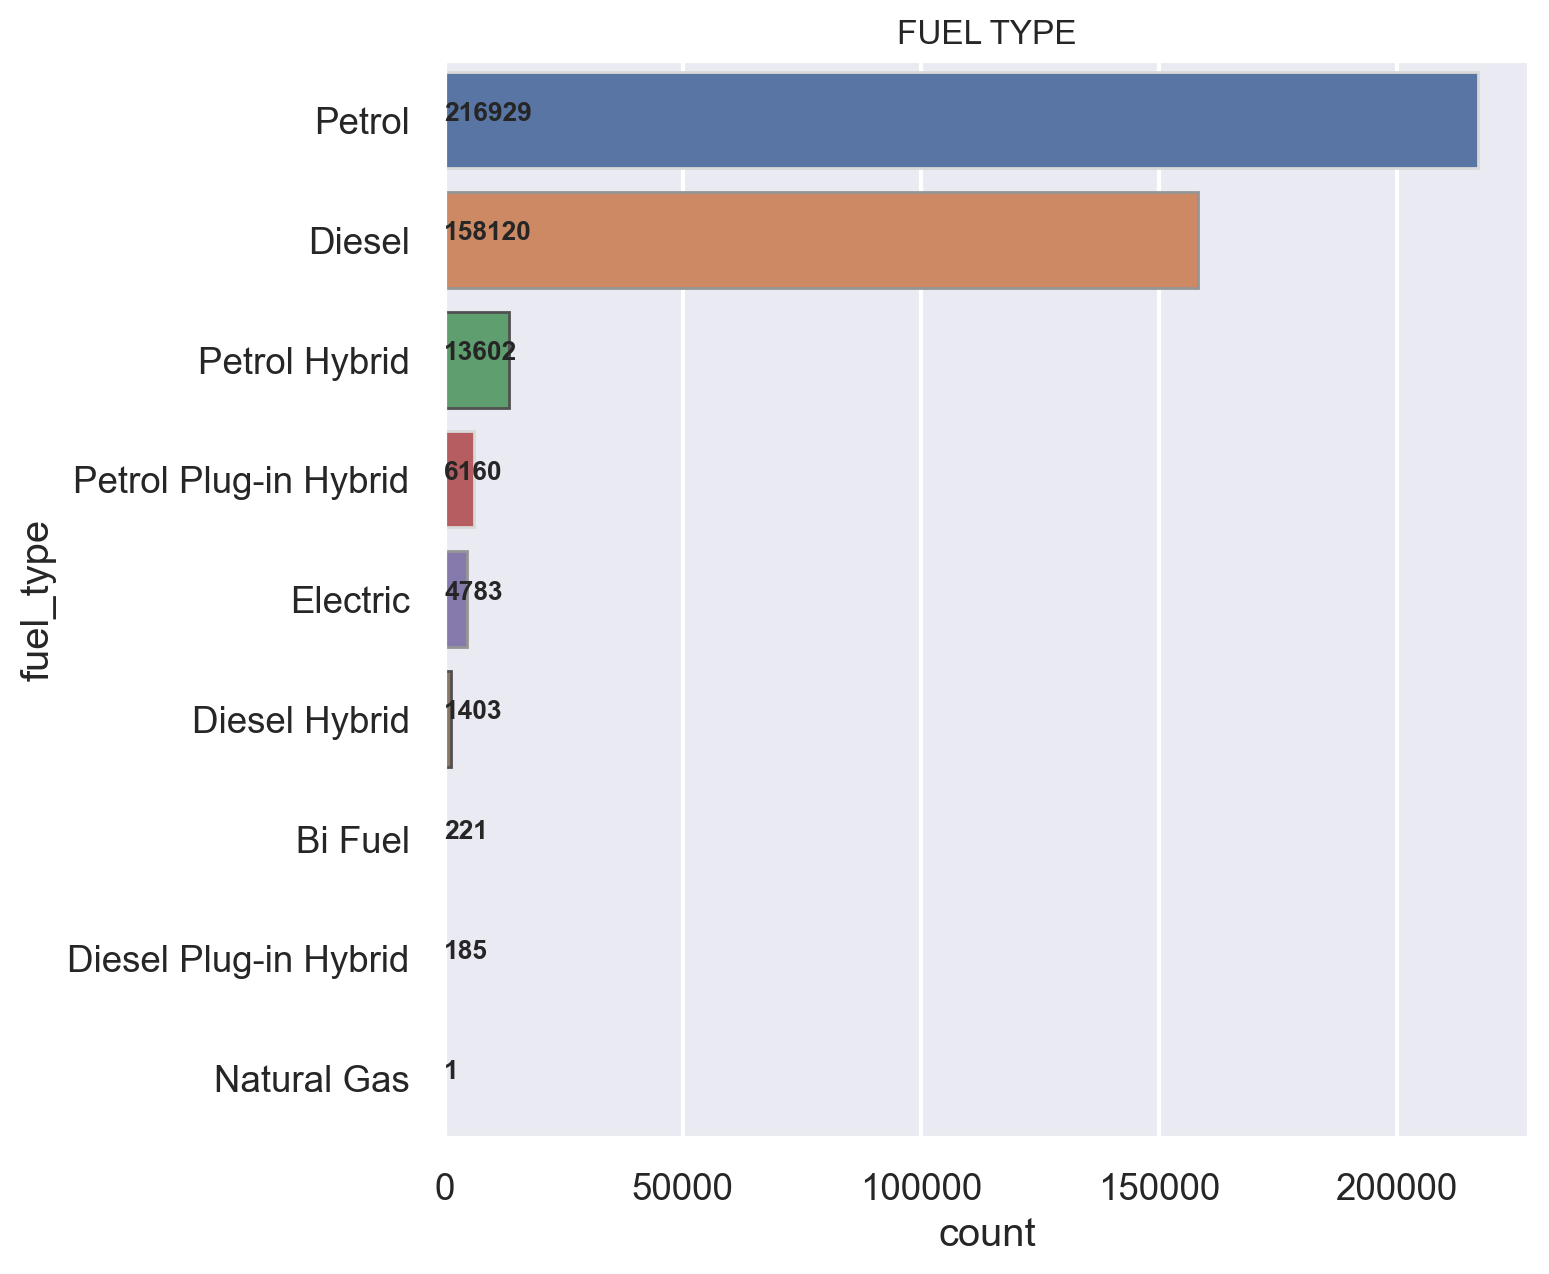

In [18]:
countplot_(adverts, 'fuel_type', "FUEL TYPE") 


The data set contains 401404 records and the variable in question has 9 unique categories. The most common category is "Petrol," which appears as the fuel type for approximately 54.11% of the vehicles in the data set. The other categories, including "Diesel," "Petrol Hybrid," "Petrol Plug-in Hybrid," "Electric," "Diesel Hybrid," "Bi Fuel," "Diesel"etc. are used in smaller percentages of the vehicles.

#### 1.2. Analysis of Predictive Power of Features (2-3)

Phik  is a new and practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution

interval columns not set, guessing: ['public_reference', 'mileage', 'year_of_registration', 'price']


<AxesSubplot:>

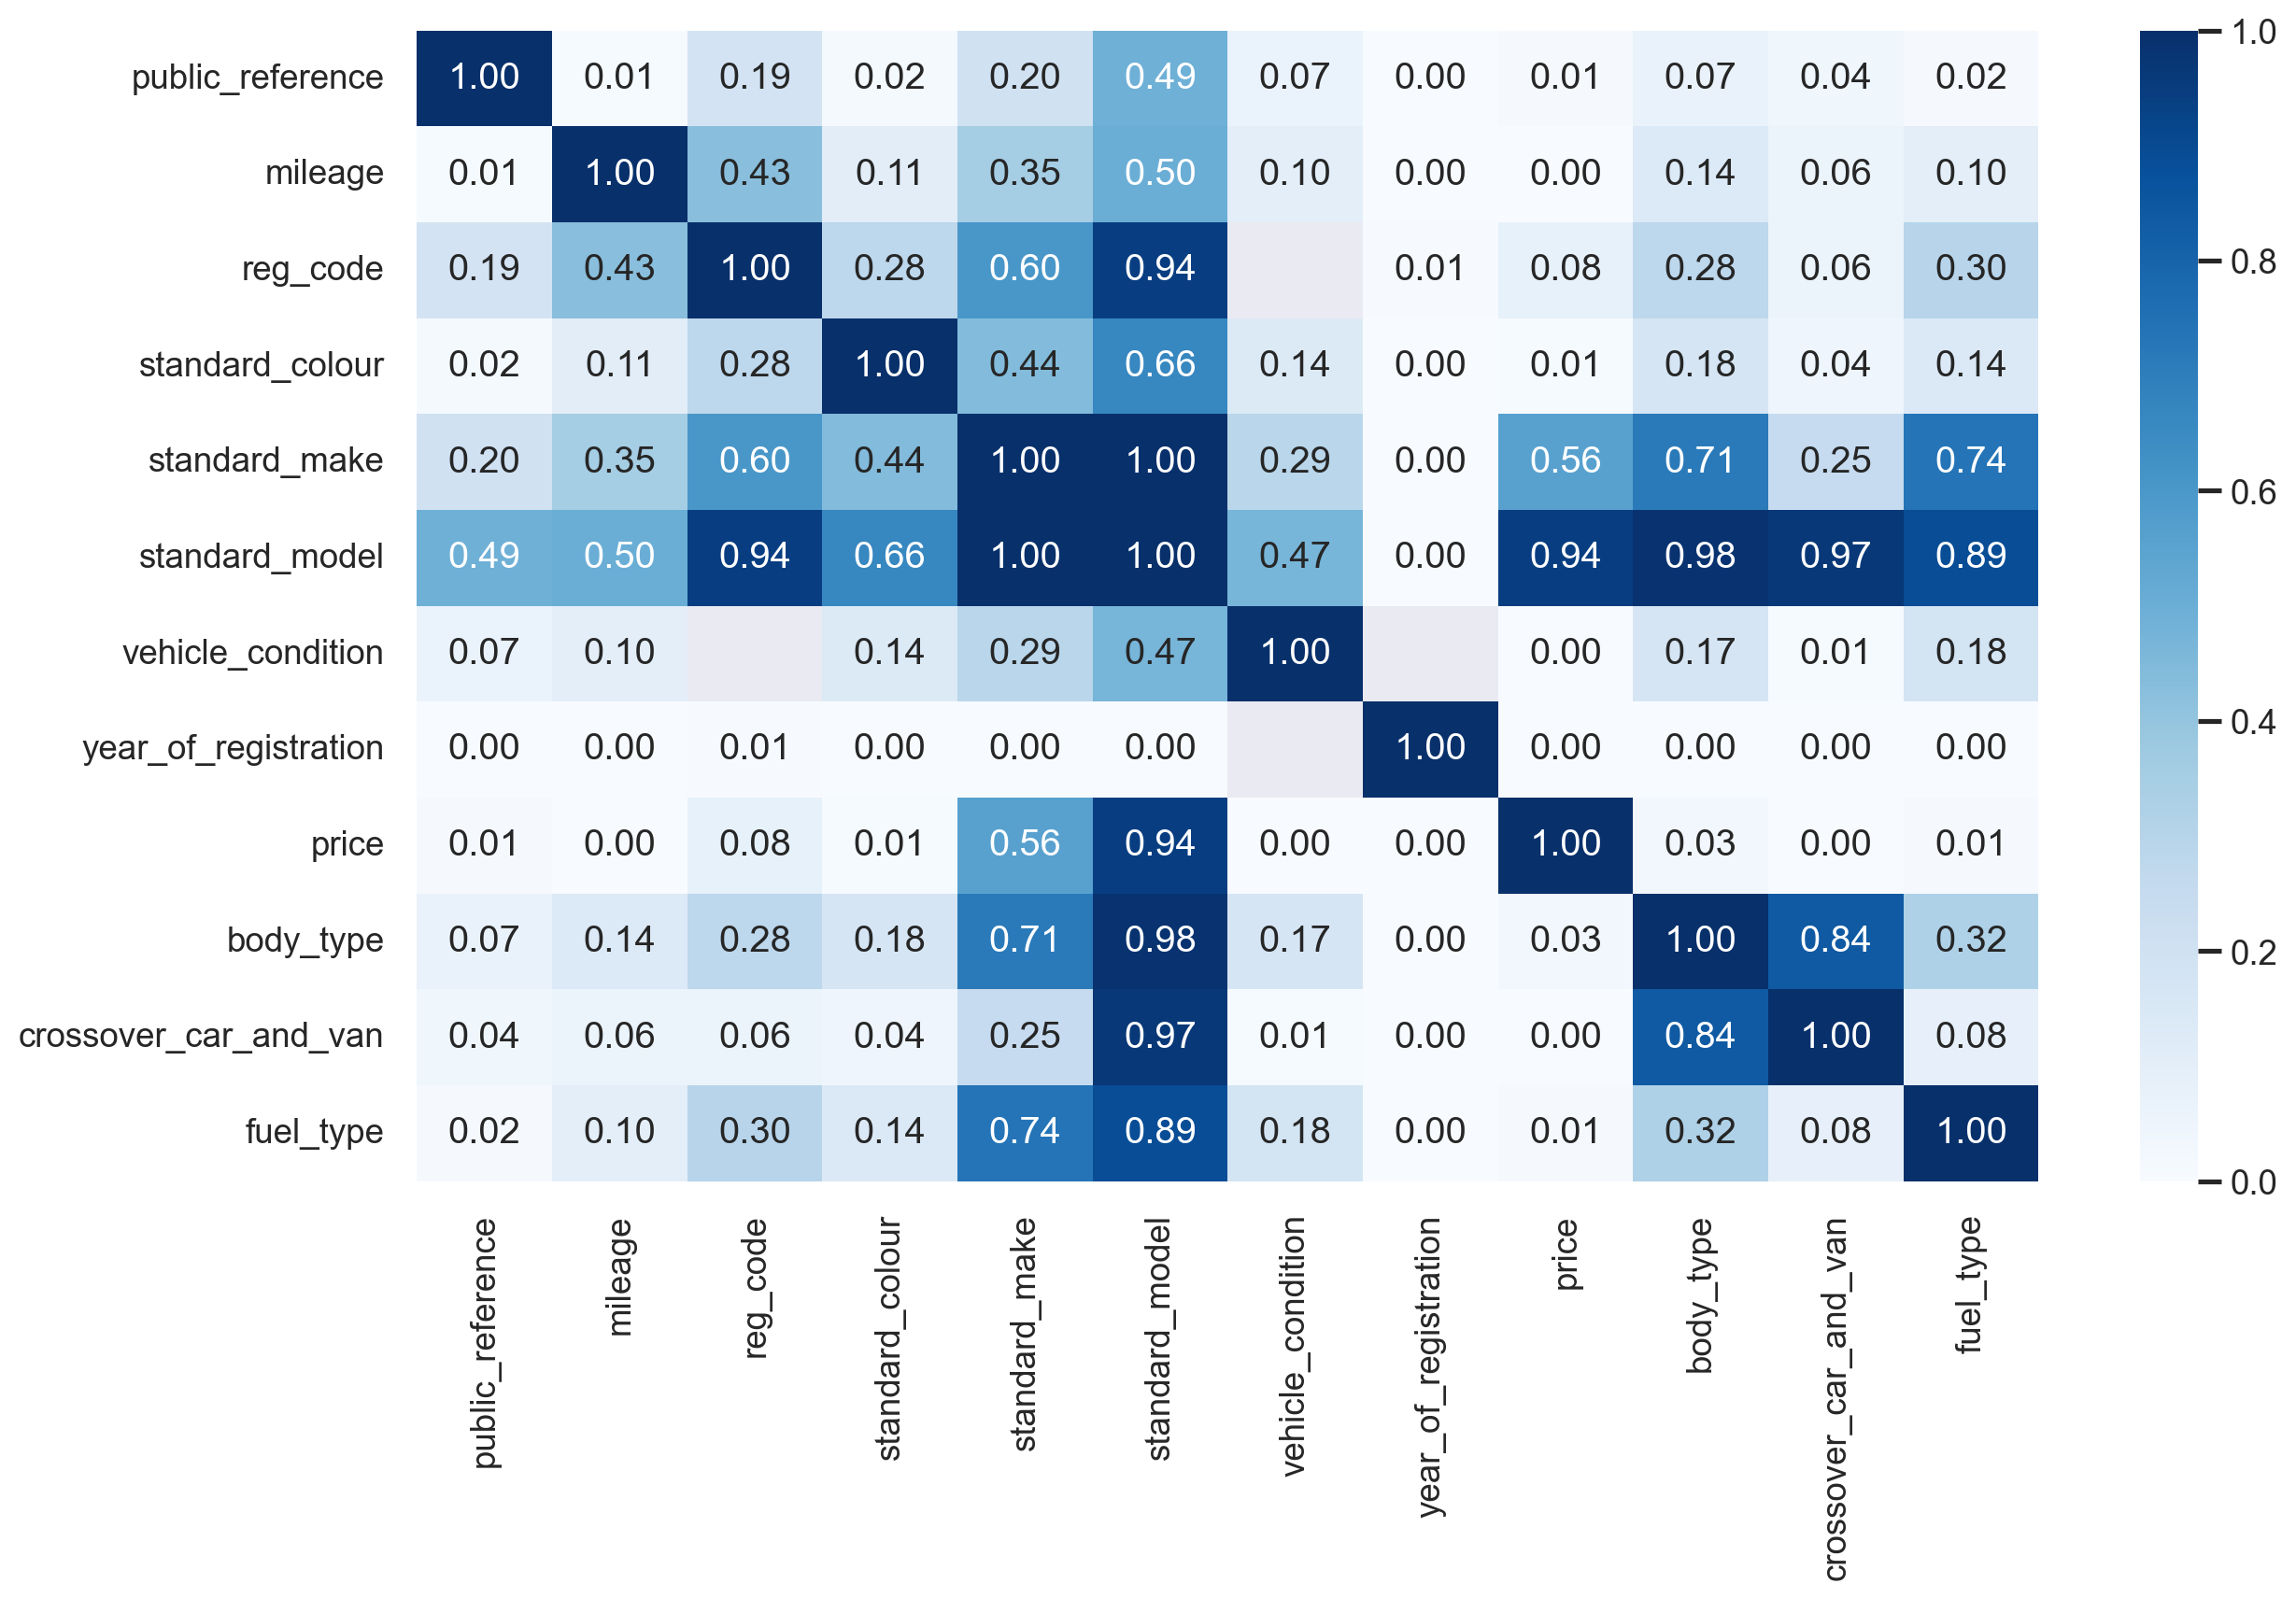

In [19]:
plt.figure(figsize=(14,8))
corr = adverts.phik_matrix()
sns.heatmap(corr, annot=True, fmt='.2f',cmap="Blues")

To determine the predictive power of features, i will be using both the PPS or ppscore library and the Heatmap. This is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix)

<!-- Install and import the library -->

In [20]:
pip install -U ppscore --quiet


Note: you may need to restart the kernel to use updated packages.


In [21]:
import ppscore as pps

In [22]:
pps.predictors(adverts, "price")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,standard_model,price,0.257917,regression,True,mean absolute error,9920.0568,7361.503611,DecisionTreeRegressor()
1,year_of_registration,price,0.098874,regression,True,mean absolute error,9562.3086,8616.847180,DecisionTreeRegressor()
2,standard_make,price,0.094636,regression,True,mean absolute error,9920.0568,8981.258534,DecisionTreeRegressor()
3,reg_code,price,0.088228,regression,True,mean absolute error,9465.0046,8629.930358,DecisionTreeRegressor()
4,public_reference,price,0.000000,regression,True,mean absolute error,9920.0568,11227.348485,DecisionTreeRegressor()
5,mileage,price,0.000000,regression,True,mean absolute error,10053.4958,10900.890951,DecisionTreeRegressor()
6,standard_colour,price,0.000000,regression,True,mean absolute error,9564.7300,10303.704038,DecisionTreeRegressor()
7,vehicle_condition,price,0.000000,regression,True,mean absolute error,9920.0568,9999.400923,DecisionTreeRegressor()
8,body_type,price,0.000000,regression,True,mean absolute error,10162.0666,10233.358922,DecisionTreeRegressor()
9,crossover_car_and_van,price,0.000000,regression,True,mean absolute error,9920.0568,10794.717685,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='y'>

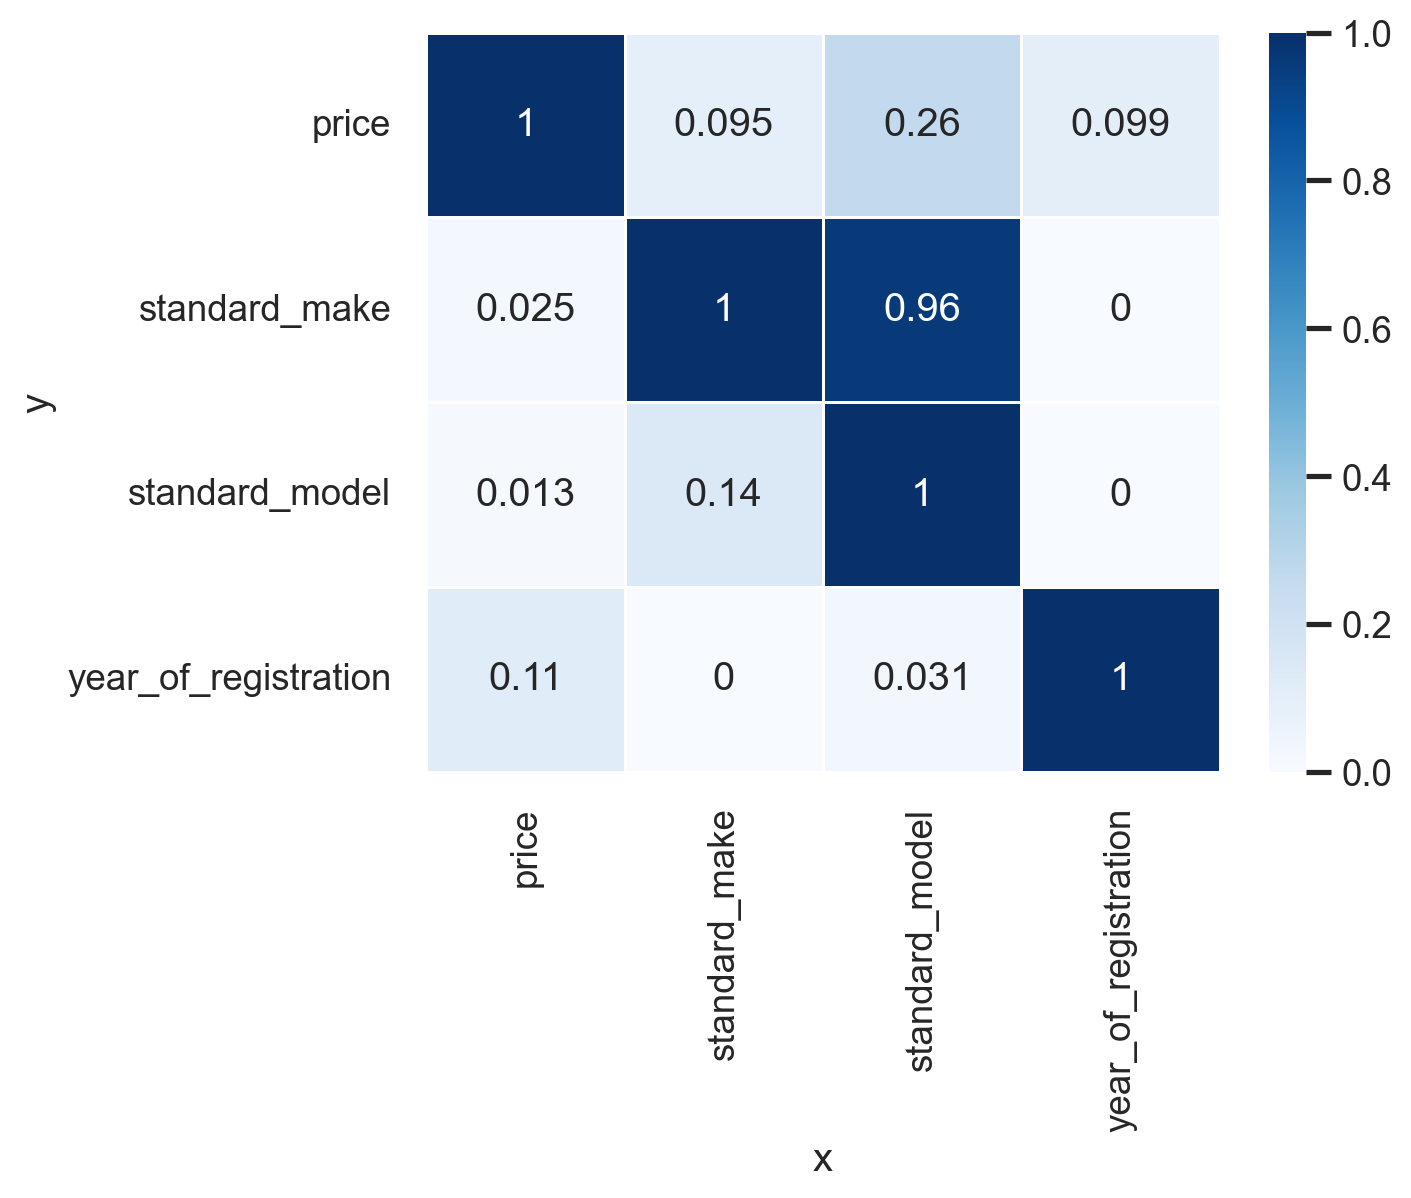

In [23]:

matrix_df = pps.matrix(adverts[['standard_model','year_of_registration','standard_make', 'price']])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

 I will be choosing the top 3 feature to further analyse.
 The predictive power of a feature is a measure of how well it can be used to predict a target variable.  From  the table above, the  predictive power of each feature is being measured using a combination of a "predictive power score" and the mean absolute error (MAE) of a machine learning model trained on that feature.

The first feature in the table is "standard_model" with a predictive power score of 0.257917. The MAE for this feature is 9920.0568 when used with the "standard_model" regression model, and the model's score on the test set (as measured by the MAE) is 7361.503611. This means that, on average, the model's predictions are off by about 7361.503611 when using this feature on the test set. The difference between the baseline score and the model score (9920.0568 - 7361.503611) may be a measure of the improvement in prediction accuracy provided by the feature.

The second feature in the table is "year_of_registration" with a predictive power score of 0.098874. The MAE for this feature is 9562.3086 when used with the "DecisionTreeRegressor" model, and the model's score on the test set is 8616.847180. This suggests that it may have slightly better predictive power than the "standard_model" feature.

The third feature in the table is "standard_make" with a predictive power score of 0.094637. The MAE for this feature is 8981.254896 when used with the "DecisionTreeRegressor" model, and the model's score on the test set is 8981.254896. This suggests that it may have the best predictive power of the three features listed in the table.

#### 1.3. Data Processing for Data Exploration and Visualisation 

Text(0, 0.5, 'Price')

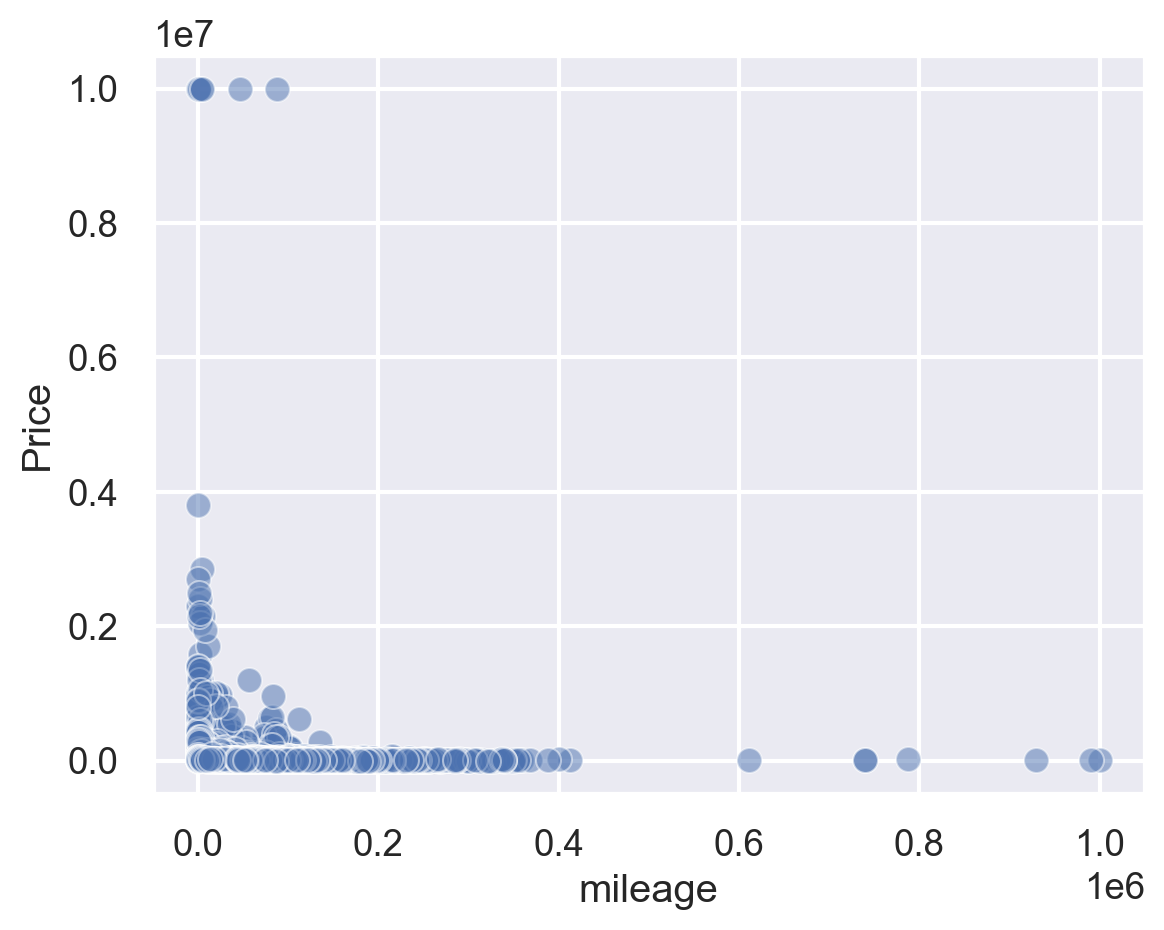

In [24]:
sns.set_style('darkgrid')
ax = sns.scatterplot(x=adverts['mileage'], y=adverts['price'], alpha=0.5)
# x = np.linspace (y_true.min(), y_true.max ())
# plt.plot(x, x, color='red')
ax. set_xlabel ('mileage')
ax.set_ylabel( 'Price')

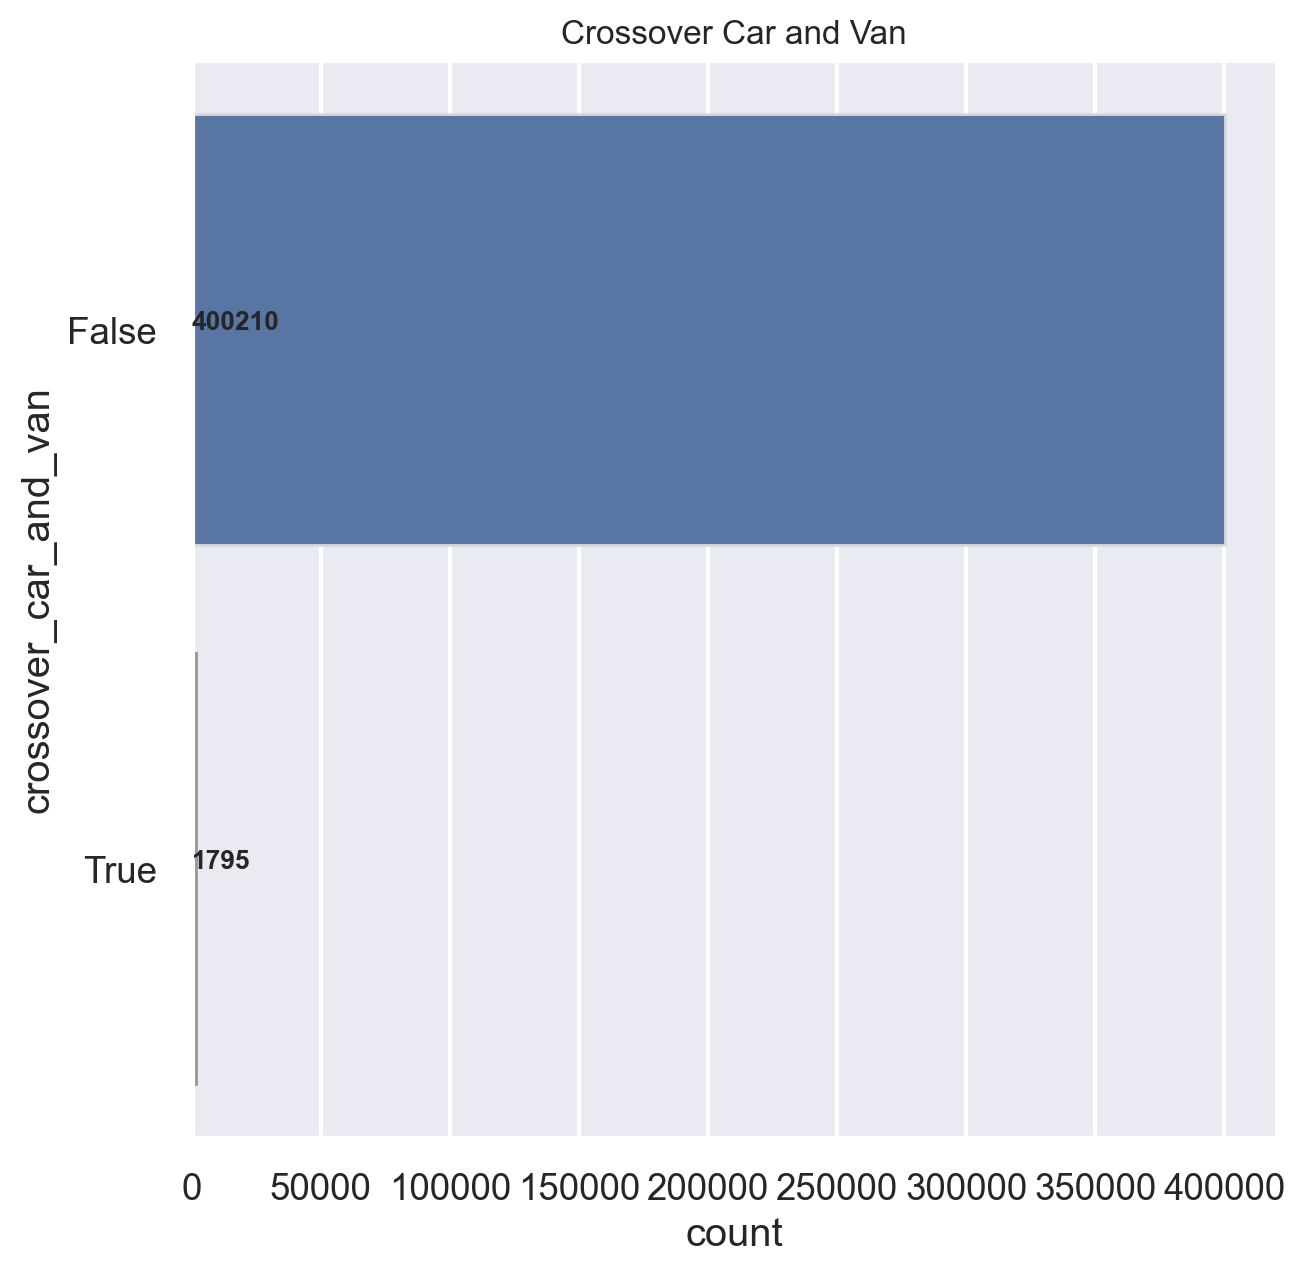

In [25]:
countplot_(adverts, 'crossover_car_and_van', "Crossover Car and Van") 

 There is a significant discrepancy between the number of vehicles classified as crossovers (400,210) and those that are not (1,795). This suggests that the majority of cars and vans in this dataset are considered crossovers.One possible explanation for this could be that the definition of a crossover vehicle has become increasingly broad in recent years, leading to more vehicles being classified as such.The number of false cases is relatively small compared to the true cases, this indicates that the data set is skewed towards the true cases and might not be representative of the population. And it's also possible that the data collection process is biased towards the true cases.

#### 2. Data Processing for Machine Learning

#### 2.1. Dealing with Missing Values, Outliers, and Noise 

#### Standard Colour

In [33]:
adverts['standard_colour'].mode()[0]

'Black'

In [26]:
# Identify the unique values of the 'standard_colour' and 'standard_make' columns in the 'adverts' DataFrame.
color_type = adverts.standard_colour.unique()
make_types = adverts.standard_make.unique()


color_type
make_types
# Initialize an empty list called 'newList'.
newList = []

# Iterate through the unique values in 'make_types'.
for L in make_types:
    if L in ["Reliant","Pontiac"] :
        a = adverts.loc[adverts['standard_make'] == L]
        a['standard_colour'] = a['standard_colour'].fillna('Black')
        newList.append(a)
    else: 
    
        x = adverts.loc[adverts['standard_make'] == L]


        e = x.standard_colour.mode()[0]



    
        x['standard_colour'] = x['standard_colour'].fillna(e)

        newList.append(x)
advertss = pd.concat(newList)
advertss = advertss.reset_index()


For each value in 'make_types', check if it is either 'Reliant' or 'Pontiac'(as they only occur once and have NAN value for standard colour). If it is, select all rows from the 'adverts' DataFrame where the value of the 'standard_make' column is equal to the current value in the iteration, and assign the result to a new DataFrame called 'a'. Then, fill any null values in the 'standard_colour' column of 'a' with the string 'Black', and append 'a' to 'newList'.
If the value in 'make_types' is not 'Reliant' or 'Pontiac', select all rows from the 'adverts' DataFrame where the value of the 'standard_make' column is equal to the current value in the iteration, and assign the result to a new DataFrame called 'x'. Then, fill any null values in the 'standard_colour' column of 'x' with the mode (most common value) of the 'standard_colour' column in 'x', and append 'x' to 'newList'.
Concatenate all the DataFrames in 'newList' into a single DataFrame called 'advertss'.
Reset the index of 'advertss' to start from 0.



I chose to fill the missing values where the groups has only null values("Reliant","Pontiac") only with black because that is the most occurring color in the column.

### Mileage

In [27]:
advertss.mileage = advertss.mileage.fillna(advertss.mileage.mean())

In [28]:
advertss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  402005 non-null  int64  
 1   public_reference       402005 non-null  int64  
 2   mileage                402005 non-null  float64
 3   reg_code               370148 non-null  object 
 4   standard_colour        402005 non-null  object 
 5   standard_make          402005 non-null  object 
 6   standard_model         402005 non-null  object 
 7   vehicle_condition      402005 non-null  object 
 8   year_of_registration   368694 non-null  float64
 9   price                  402005 non-null  int64  
 10  body_type              401168 non-null  object 
 11  crossover_car_and_van  402005 non-null  bool   
 12  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 37.2+ MB


This fills any null values in the 'mileage' column with the mean of the column. Finally, the resulting series is assigned back to the 'mileage' column of 'advertss', effectively replacing the null values in the original column with the mean value

### Dealing with the Mileage outlier

<AxesSubplot:xlabel='mileage'>

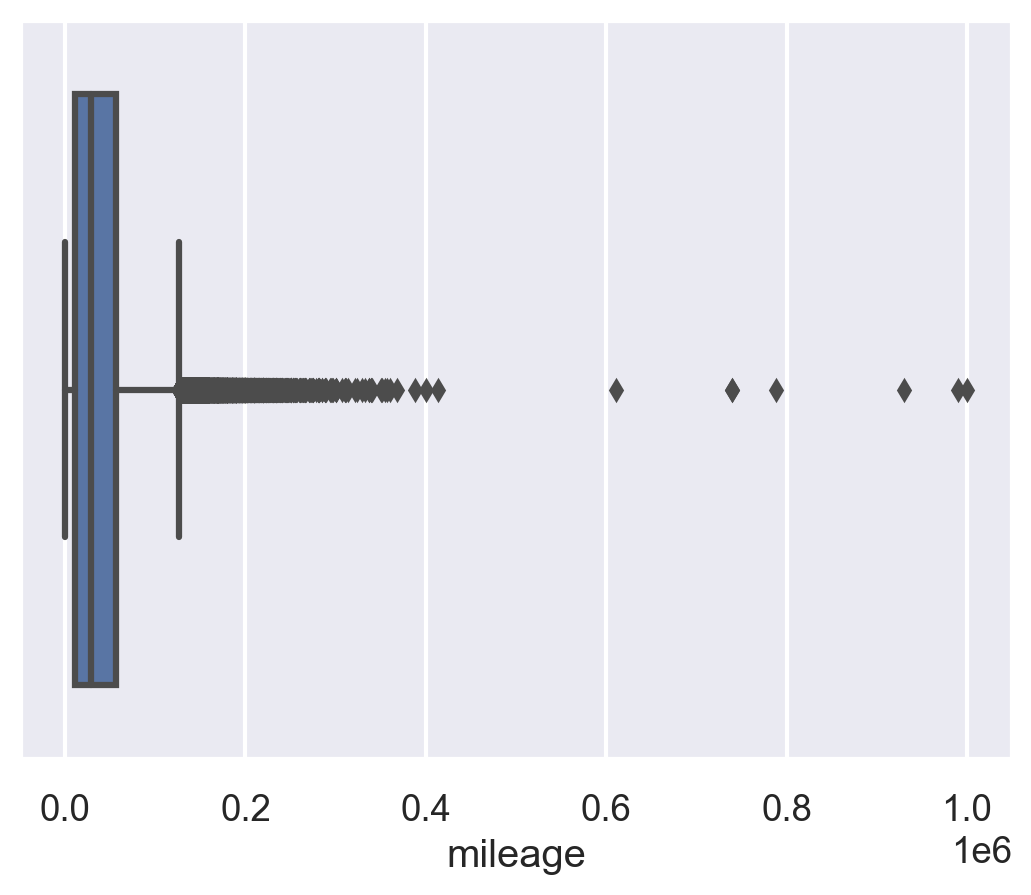

In [29]:
sns.boxplot(x = adverts['mileage'])

<AxesSubplot:ylabel='mileage'>

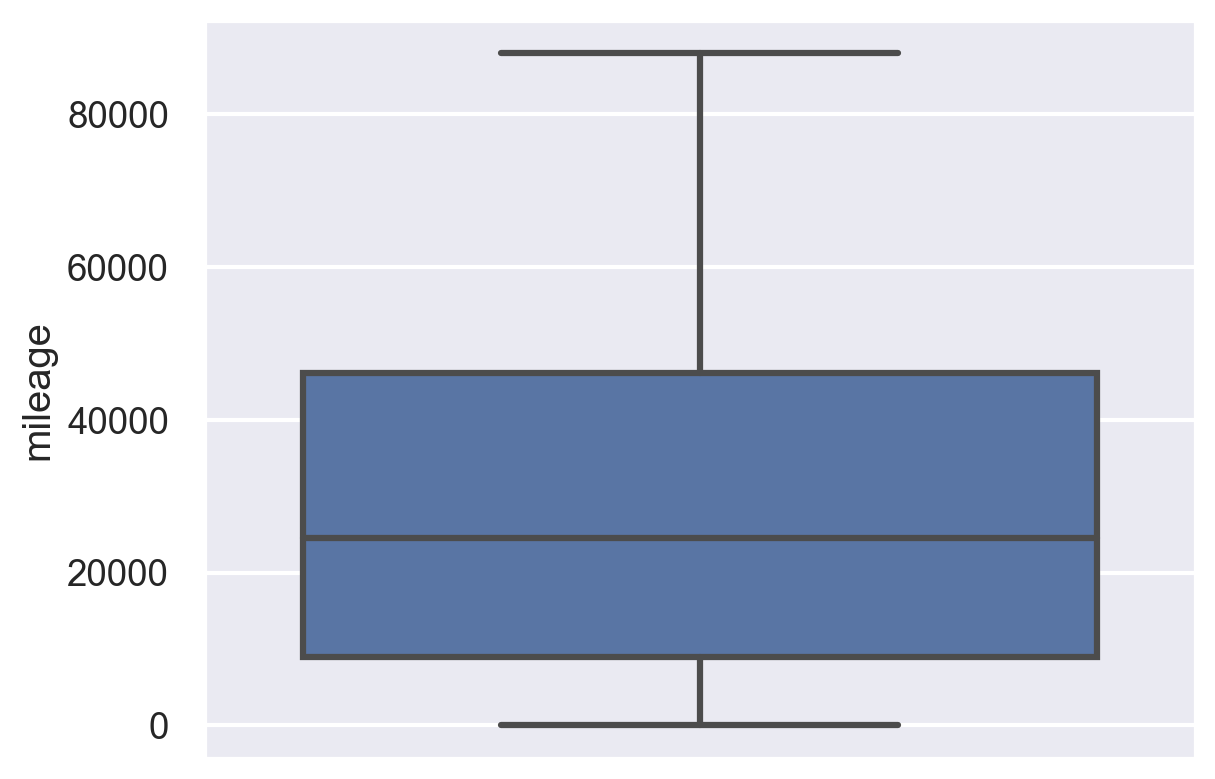

In [30]:
sns.boxplot(y=adverts[adverts['mileage']<=adverts['mileage'].quantile(0.9)]['mileage'])

In [31]:
advertss.loc[advertss['mileage'] > advertss['mileage'].quantile(0.9),'mileage'] = np.median(advertss['mileage'])

The outliers seem to be above the 90th percentile of the mileage column.
The code above  uses the 'loc' indexer and the 'quantile()' method to select all rows in 'advertss' where the value of the 'mileage' column is greater than the 90th percentile of the 'mileage' column. It then uses NumPy's 'median()' function to compute the median value of the 'mileage' column and assigns this value to all the selected rows. This effectively replaces the values in the 'mileage' column that are greater than the 90th percentile with the median value because the mean value is highly influenced by the outliers.

### 2.2. Feature Engineering, Data Transformations, Feature Selection (2-3)

In [32]:
Clean_adverts = pd.read_csv('/Users/macbook/new_adverts.csv')
# importing the clean data after all the missing values has been dealt with

In [33]:
Clean_adverts = Clean_adverts.drop(columns = 'Unnamed: 0')

##### YEAR OF REGISTERATION

Looking closely at the public reference column data, it contains the year, month and day when the car advertisement was published.
By extracting the year from each public references, i can create a new column called year_of_advertisement|.

In [34]:
Clean_adverts['year_of_advertisement'] = Clean_adverts.public_reference.astype(str).str[0:4].astype(int)

##### VEHICLE AGE

Based on the data set, i will assume the year of registration as the 'born' year of the vehicle. For an easy way to calculate the vehicle age, we subtract  the year of registration from the present year.

In [35]:
present_year = 2021
# being the year adopted in my data cleaning

In [36]:
Clean_adverts['vehicle_age'] =  present_year - Clean_adverts.year_of_registration

#### AVERAGE MILEAGE

Determining the average mileage of a car can be difficult. In 2019, the average number of miles driven by cars in England was 7,400, according to government statistics. These figures may not accurately reflect the current situation, as the latest available data is from 2022, which was impacted by the COVID-19 pandemic, resulting lockdowns and rising inflation. Therefore, it is more accurate to use the 2019 figures as a baseline for a typical year

In [37]:
Clean_adverts['average_mileage'] = Clean_adverts.mileage/ Clean_adverts.vehicle_age

The 'average_mileage' column is being created by dividing the values in the 'mileage' column by the corresponding values in the 'vehicle_age' column for each row in the 'Clean_adverts' DataFrame. This results in a new column containing the average mileage of each vehicle, calculated based on its age

In [38]:
Clean_adverts.loc[Clean_adverts['average_mileage'] == np.inf, 'average_mileage'] = Clean_adverts[Clean_adverts['average_mileage'] == np.inf]['mileage']

In [39]:
Clean_adverts.average_mileage = Clean_adverts.average_mileage.fillna(0)

#### VEHICLE RATING

In [40]:
bins = [0,2500,5000,7500,12500,125000]

In [41]:
scale =['excellent', 'great', 'good', 'poor', 'very poor']

In [42]:
Clean_adverts['vehicle_rating'] = pd.cut(Clean_adverts['average_mileage'], bins, labels=scale, right=False, include_lowest=True)

The vehicle_rating values are being determined by binning the values in the average_mileage column using the bins list as the cutpoints. The resulting bins are then labeled using the scale list.
It assigns a rating to each row based on the average mileage of the vehicle. 

The "vehicle_rating" feature can be used to understand the condition of a vehicle based on its average mileage. For example, if a vehicle has a very low mileage, it's likely that the vehicle is in excellent condition, and on the other hand, if a vehicle has a very high mileage, it's likely that the vehicle is in poor condition

### 3.1. Algorithm Selection, Model Instantiation and Configuration 

In [43]:
numerical_features = ['public_reference', 'mileage', 'year_of_registration','year_of_advertisement','vehicle_age','average_mileage']
categorical_features = ['standard_colour','standard_make', 'standard_model', 'vehicle_condition','body_type','crossover_car_and_van','fuel_type','vehicle_rating']
# splitting of the features into numerical and categorical features 

In [44]:
cols_of_interest =['public_reference', 'mileage', 'year_of_registration','year_of_advertisement','vehicle_age','average_mileage','standard_colour','standard_make', 'standard_model', 'vehicle_condition','body_type','crossover_car_and_van','fuel_type','vehicle_rating']
# creating a variable for the columns of the dataframes we are interested in

In [45]:
copy_of_Clean_adverts = Clean_adverts.copy()
# creating a copy of the clean dataset before the categorical featuress will be encoded

In [46]:
Clean_adverts[categorical_features] = Clean_adverts[categorical_features].astype(str)
# converting all categorical_features data types  to string

In [47]:
clean_categorical_features = ['standard_colour','standard_make', 'standard_model','body_type','fuel_type','vehicle_rating']

 ### Model Instantiation

In [48]:
encoder =  OrdinalEncoder()

I decided to go with Ordinal encoder because the algorithms/models i will be using can only handle numerical data. Also because ordinal encoder assigns a unique integer value to each category, which helps to maintain interpretability of your data. One can still understand which category each integer represents, which makes it easier to understand the results of the analysis.

In [49]:
Clean_adverts[clean_categorical_features] = encoder.fit_transform(Clean_adverts[clean_categorical_features])
# This will fit and transform the selected categorical features into numerical values 

In [50]:
Clean_adverts[clean_categorical_features] = Clean_adverts[clean_categorical_features].astype(str)
# converting all categorical_features data types  to string

In [51]:
Clean_adverts.vehicle_condition = Clean_adverts.vehicle_condition.map({'USED':0, 'NEW':1})
# This  converts the vehicle condition into numerical data. By mapping the categorical data ('USED' and 'NEW')
# into numerical values(0 and 1).

In [52]:
Clean_adverts.crossover_car_and_van = Clean_adverts.crossover_car_and_van.astype('category').cat.codes.astype('int64')
# this  first convert the column to a categorical data type using the astype()
# method, then use the cat.codes attribute to get the integer codes for the categories, 
# and finally it's converting the resulting series to int64 using astype() method.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
        Clean_adverts[cols_of_interest], Clean_adverts['price'], 
    test_size=0.2, random_state=2034
)
ttn_X_train, ttn_X_test, ttn_y_train, ttn_y_test = X_train, X_test, y_train, y_test

# split the data set

Choosing the correct regression model can be a tricky task, as there are many different models to choose from, each with their own strengths and weaknesses. I will be trying out three different regression models: a linear regressor, a decision tree regressor, and a random forest regressor. After training the models, I will evaluate their performance using mean absolute error and  R2 score and select one.

#### Random Forest Regressor

In [54]:
rfr = RandomForestRegressor()

In [55]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [58]:
print('baseline mean absolute error', mean_absolute_error(y_test, baseline.predict(X_test)))
print('mean absolute error =', mean_absolute_error(y_test, rfr.predict(X_test)))
print('model score=', rfr.score( X_train, y_train))
print('R2 score=', r2_score(y_test, rfr.predict(X_test)))

baseline mean absolute error 5899.647078778563
mean absolute error = 1567.4164282440167
model score= 0.9792950466476131
R2 score= 0.8831256133496171


#### Decision Tree Regressor

In [59]:
dtr = DecisionTreeRegressor()

In [60]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [62]:
print('baseline mean absolute error', mean_absolute_error(y_test, baseline.predict(X_test)))
print('mean absolute error =', mean_absolute_error(y_test, dtr.predict(X_test)))
print('model score=', dtr.score( X_train, y_train))
print('R2 score=', r2_score(y_test, dtr.predict(X_test)))

baseline mean absolute error 5899.647078778563
mean absolute error = 1950.773732882941
model score= 0.9940321014338872
R2 score= 0.8000615615883284


#### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [87]:
mean_absolute_error(y_test, baseline.predict(X_test))
print('mean absolute error =', mean_absolute_error(y_test, lr.predict(X_test)))
print('model score=', lr.score( X_train, y_train))
print('R2 score=', r2_score(y_test, lr.predict(X_test)))

mean absolute error = 4131.2280837463895
model score= 0.5157584430149336
R2 score= 0.516892073374827


After evaluating the performance of the three models, it is clear that the random forest regressor is the best option. It has the lowest mean absolute error(1567.4164282440167), the highest R-squared score (0.8831256133496171), and the highest model score (0.9792950466476131) when compared to the decision tree regressor and linear regressor. As a result, I will be selecting the random forest regressor for my further analysis.

### 3.2. Grid Search, and Model Ranking and Selection

In [73]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [92]:
def stratified_sample(df,col, N):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)





In [97]:
X_train, X_test, y_train, y_test = train_test_split(
        Clean_adverts[cols_of_interest], Clean_adverts['price'], 
    test_size=0.2, random_state=2034
)
ttn_X_train, ttn_X_test, ttn_y_train, ttn_y_test = X_train, X_test, y_train, y_test

In [98]:
grid_param = {
    'max_depth' : [ 15, 20, 25],
    'min_samples_split': [ 15, 20, 25],
    'min_samples_leaf' : [ 6,7,8]
}

In [99]:
grid = GridSearchCV(
    RandomForestRegressor(),
    grid_param,
    return_train_score = True,
    scoring = 'neg_mean_absolute_error')

In [100]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [15, 20, 25]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [101]:
grid.score(X_train, y_train)

-1277.211791270014

In [102]:
grid.best_params_

{'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 15}

The best performing model is the random forest regressor with a negative mean absolute error of -1277.211791270014 and grid best parameters of {'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 15}.In this case, the grid search was applied to the random forest regressor to find the best combination of the hyperparameters max_depth, min_samples_leaf, and min_samples_split. The best performing combination was found to be {'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 15}.
This combination of hyperparameters resulted in a negative mean absolute error of -1277.211791270014, which is a significant improvement compared to the baseline mean absolute error of 5899.647078778563 and the mean absolute error obtained before running the grid search (1567.4164282440167).
The grid search helped to improve the performance of the random forest regressor by tuning its hyperparameters. Based on the results, it is clear that the random forest regressor is still the best model for this problem, and the grid search technique was successful in finding the best combination of hyperparameters.



#### Coarse-Grained Evaluation/Analysis

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
        Clean_adverts[cols_of_interest], Clean_adverts['price'], 
    test_size=0.2, random_state=2034
)
ttn_X_train, ttn_X_test, ttn_y_train, ttn_y_test = X_train, X_test, y_train, y_test

In [69]:
rfr = RandomForestRegressor(
                max_depth=25, min_samples_split=15, min_samples_leaf=6, n_estimators= 400
            )

In [70]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=6, min_samples_split=15,
                      n_estimators=400)

In [71]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [74]:
mean_absolute_error(y_test, baseline.predict(X_test))
print('mean absolute error =', mean_absolute_error(y_test, rfr.predict(X_test)))
print('model score=', rfr.score( X_train, y_train))
print('R2 score=', r2_score(y_test, rfr.predict(X_test)))
print('mean cross_val_score',cross_val_score(rfr, X_train, y_train).mean())

mean absolute error = 1573.855228406005
model score= 0.925136242052894
R2 score= 0.8877807752086369
mean cross_val_score 0.8849790027598573


The adjusting of the hyperparameters of the random forest regressor has improved its performance. The mean absolute error is 1573.855228406005, which is a slight increase from the previous mean absolute error (1567.4164282440167). The model score is 0.925136242052894, which indicates that the model is able to explain 92.5% of the variation in the target variable. The R-squared score is 0.8877807752086369, which indicates that the model is able to explain 88.8% of the variation in the target variable. In addition, the mean cross_val_score is 0.8849790027598573, which is a measure of how well the model generalizes to new unseen data. A score close to 1.0 indicates that the model is able to generalize well to new data.Overall, the model is performing well and able to explain a large proportion of the variation in the target variable.


Text(0, 0.5, 'Predicted Target Value')

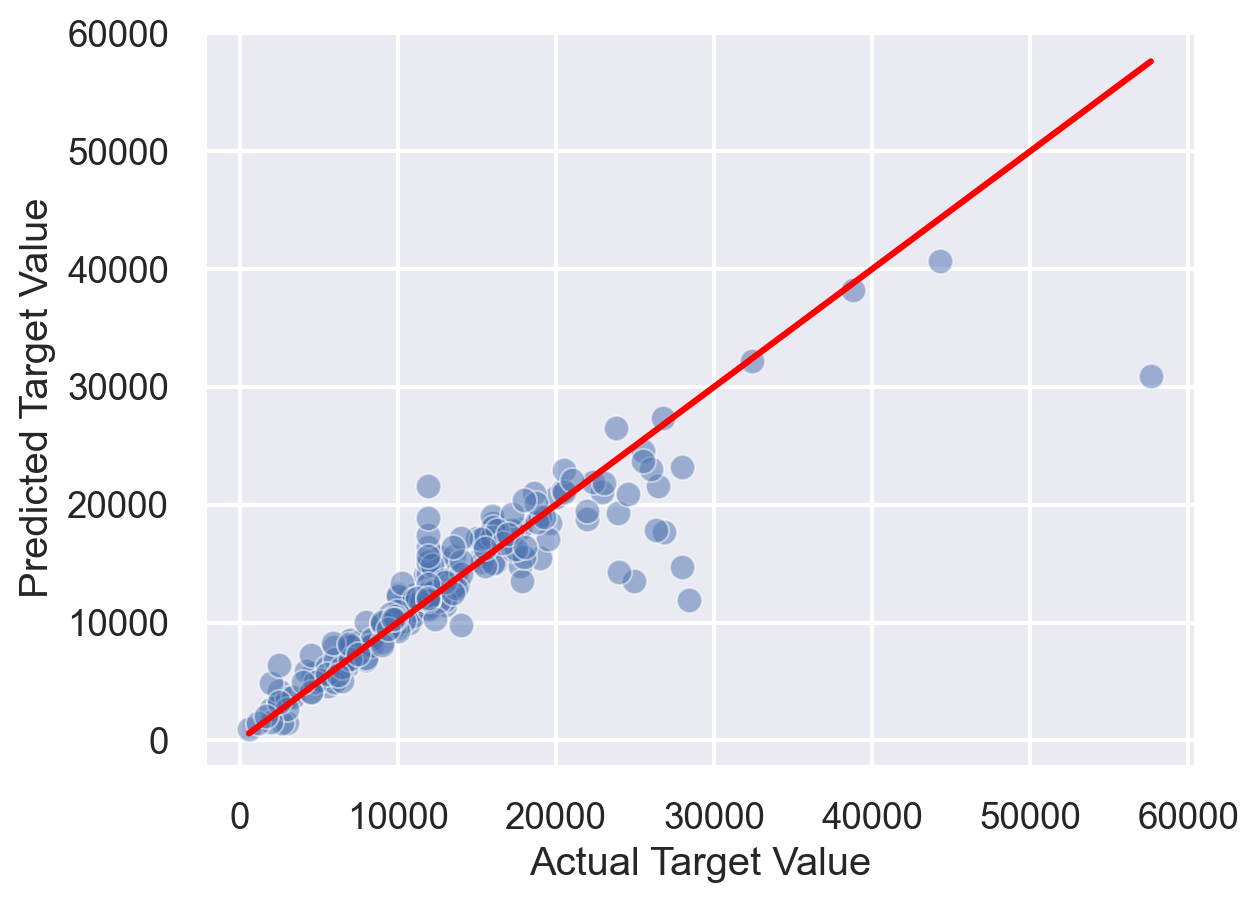

In [112]:
y_true = y_test[:200]
y_pred = rfr.predict (X_test)
ax = sns.scatterplot(x=y_true, y=y_pred[:200], alpha=0.5)
x = np.linspace (y_true.min(), y_true.max ())
plt.plot(x, x, color='red')
ax. set_xlabel ('Actual Target Value')
ax.set_ylabel( 'Predicted Target Value')


Based on the actual vs predicted plot, it can be observed that the model is making predictions that are close to the true values. The majority of the data points are distributed across the line of perfect predictions, indicating a strong correlation between the predicted and actual values.The model is able to explain a large proportion of the variation in the target variable.This means that the model is able to accurately predict the target variable based on the input features and it's a good fit for the problem.

#### Feature Importance

In [117]:
feat_imp = pd.DataFrame(
    rfr.feature_importances_,
    index=rfr.feature_names_in_,
    columns=['feat_imp']
)
feat_imp.sort_values('feat_imp', ascending=False)




,feat_imp
vehicle_age,0.245808
year_of_registration,0.205087
standard_make,0.145445
standard_model,0.111935
vehicle_condition,0.111771
body_type,0.077173
fuel_type,0.043957
mileage,0.024306
public_reference,0.015212
average_mileage,0.011580


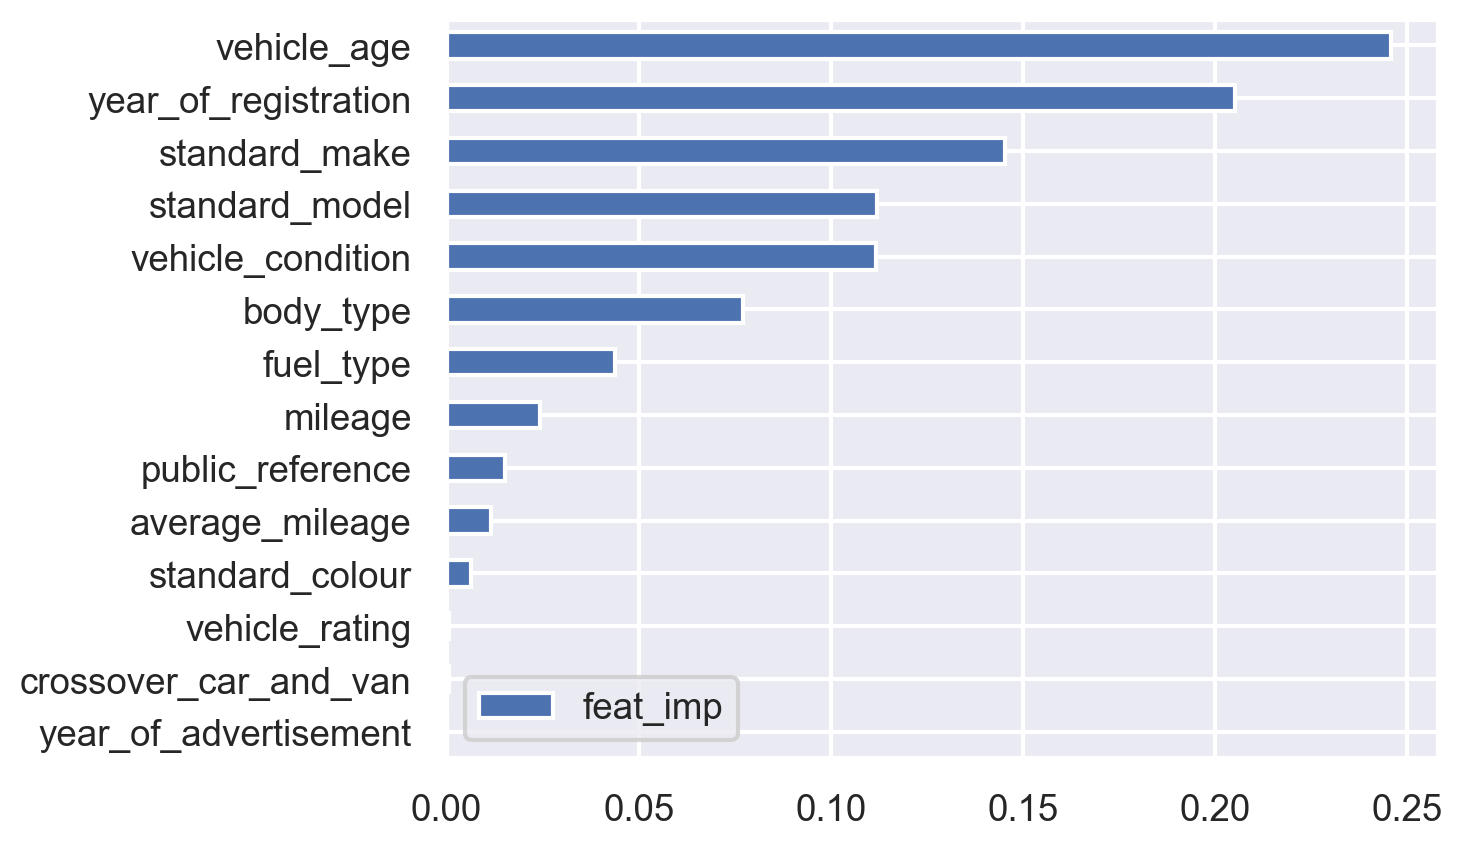

In [118]:
feat_imp = pd.DataFrame(
    rfr.feature_importances_,
    index=rfr.feature_names_in_,
    columns=['feat_imp']
)
feat_imp.sort_values('feat_imp').plot.barh();

Based on the feature importance result, it can be observed that the top 4 most important features for the model are 'vehicle_age', 'year_of_registration', 'standard_make' and 'standard_model'.

'Vehicle_age' is the most important feature with a feature importance value of 0.245808. This means that the age of the vehicle has the greatest impact on the model's predictions. The age of a vehicle can be an important factor in determining its price as older vehicles may have higher wear and tear and therefore be priced lower.

'Year_of_registration' is the second most important feature with a feature importance value of 0.205087. This means that the year the vehicle was registered can have a significant impact on the model's predictions. The year of registration can be an important factor in determining a vehicle's age and condition.This could be because newer vehicles generally command higher prices than older vehicles.


'Standard_make' is the third most important feature with a feature importance value of 0.145445. This means that the make of a vehicle can have a significant impact on the model's predictions. The make of a vehicle can be an important factor in determining its price, as certain makes and models may be more desirable or more expensive.

'Standard_model' is the fourth most important feature with a feature importance value of 0.111935. This means that the model of a vehicle can have a significant impact on the model's predictions. The model of a vehicle can be an important factor in determining its price, as certain models may be more desirable or more expensive.






#### Fine-Grained Evaluation

In [120]:
predictions = rfr.predict(X_test)

In [121]:
result_dataframe = pd.DataFrame(dict(actual=y_test, predicted= predictions)) 

In [122]:
result_dataframe[result_dataframe['actual']== result_dataframe['predicted']]

,actual,predicted
70815,11890,11890.0
371720,11890,11890.0
87179,11890,11890.0
75423,11890,11890.0
67041,11890,11890.0
...,...,...
66047,26760,26760.0
123016,11890,11890.0
75101,11890,11890.0
366076,11890,11890.0


In [123]:
result_dataframe['error'] = abs(result_dataframe['actual'] - result_dataframe['predicted'] )

In [124]:
len(result_dataframe[result_dataframe['actual']==result_dataframe['predicted']])/ len(result_dataframe)

0.0171780668450862

In [125]:
result_dataframe =pd.DataFrame(dict(actual = y_test, predicted =predictions))

Text(0.5, 1.0, 'Actual vs Predicted')

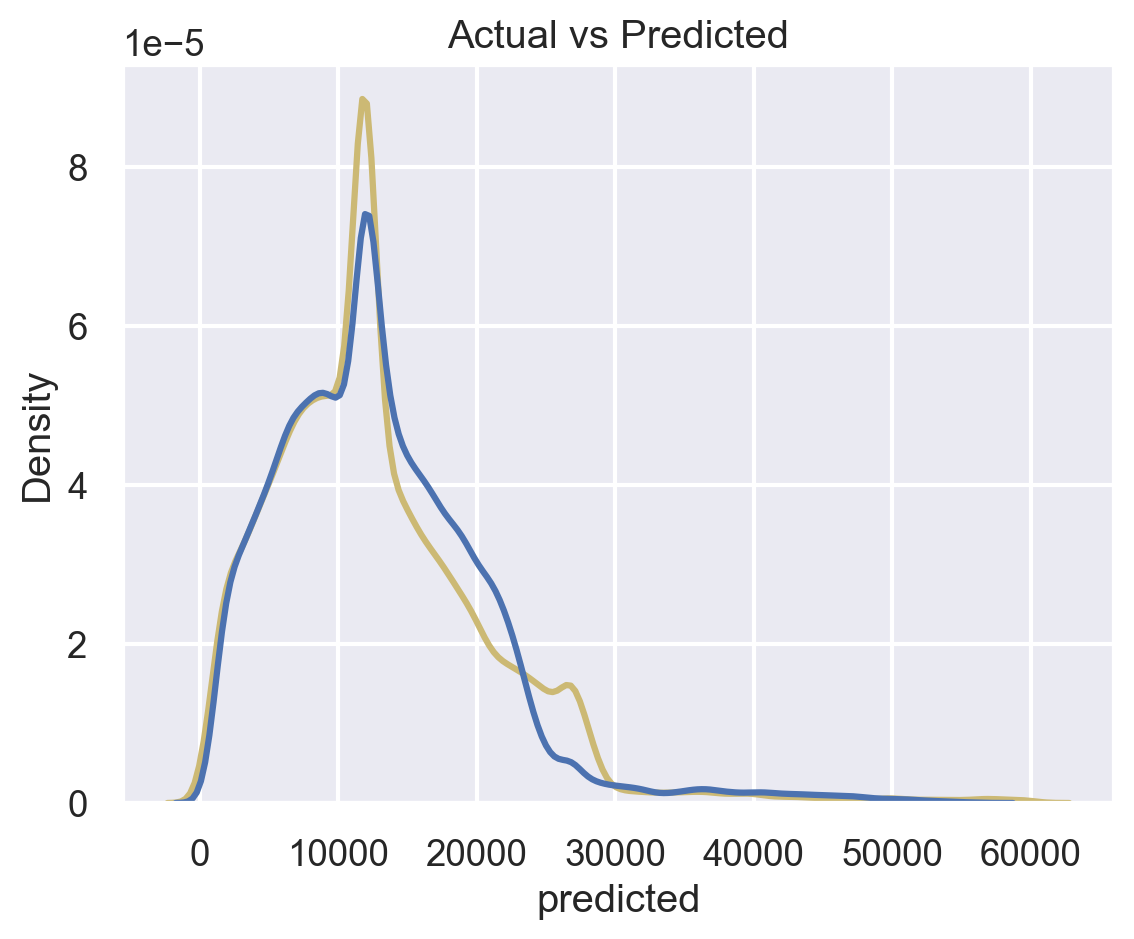

In [126]:
ax1 = sns.distplot(result_dataframe['actual'], hist=False, color="y", label="Actual")
sns.distplot(result_dataframe['predicted'], hist=False, color="b", label = "prediction", ax=ax1)
plt.title('Actual vs Predicted')

In [127]:
Upredictions = rfr.predict(Clean_adverts[cols_of_interest])

In [128]:
Upredictions

array([26760.        , 40158.91505691, 42446.0838941 , ...,
        7673.37118937,  9463.11159242, 11282.83942062])

In [129]:
Uresult_dataframe = pd.DataFrame(dict(actual=Clean_adverts['price'], predicted= Upredictions)) 

In [130]:
Uresult_dataframe

,actual,predicted
0,26760,26760.000000
1,40264,40158.915057
2,26760,42446.083894
3,42217,40422.272698
4,37138,36544.065943
...,...,...
401670,26000,13811.834778
401671,11890,14545.521286
401672,6990,7673.371189
401673,6990,9463.111592


In [131]:
Uresult_dataframe['residual'] = Uresult_dataframe['predicted'] - Uresult_dataframe['actual']   

In [132]:
Uresult_dataframe['residual_abs'] = abs(Uresult_dataframe['predicted'] - Uresult_dataframe['actual']   )

In [133]:
Uresult_dataframe

,actual,predicted,residual,residual_abs
0,26760,26760.000000,0.000000,0.000000
1,40264,40158.915057,-105.084943,105.084943
2,26760,42446.083894,15686.083894,15686.083894
3,42217,40422.272698,-1794.727302,1794.727302
4,37138,36544.065943,-593.934057,593.934057
...,...,...,...,...
401670,26000,13811.834778,-12188.165222,12188.165222
401671,11890,14545.521286,2655.521286,2655.521286
401672,6990,7673.371189,683.371189,683.371189
401673,6990,9463.111592,2473.111592,2473.111592


In [134]:
np.mean(np.abs(Uresult_dataframe['predicted'] - Uresult_dataframe['actual']))

1337.4648593405118

In [135]:
X__res = pd.concat([Clean_adverts[cols_of_interest], Uresult_dataframe['residual'], Uresult_dataframe['residual_abs']], axis= 'columns')
X__res.sort_values('residual_abs', ascending= False)

,public_reference,mileage,year_of_registration,year_of_advertisement,vehicle_age,average_mileage,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,vehicle_rating,residual,residual_abs
218340,202009214014346,10.0,2021.0,2020,0.0,10.0,1.0,10.0,151.0,1,14.0,0,6.0,0.0,-33164.348725,33164.348725
218582,202010014435221,1.0,2021.0,2020,0.0,1.0,8.0,10.0,151.0,1,14.0,0,6.0,0.0,-33133.456616,33133.456616
11576,202008272979009,0.0,2021.0,2020,0.0,0.0,8.0,46.0,470.0,1,4.0,0,6.0,0.0,-32106.936890,32106.936890
393042,202009284291568,0.0,2021.0,2020,0.0,0.0,8.0,61.0,625.0,1,13.0,0,6.0,0.0,-31693.190658,31693.190658
79933,202010094792749,10.0,2021.0,2020,0.0,10.0,17.0,7.0,435.0,1,13.0,0,4.0,0.0,-31685.725050,31685.725050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72434,202010064657081,6500.0,2020.0,2020,1.0,6500.0,8.0,53.0,425.0,0,13.0,0,1.0,1.0,0.000000,0.000000
72436,202010315643794,34000.0,2016.0,2020,5.0,6800.0,8.0,53.0,826.0,0,13.0,0,1.0,1.0,0.000000,0.000000
81772,202010165058947,10.0,2021.0,2020,0.0,10.0,8.0,7.0,809.0,1,7.0,0,6.0,0.0,0.000000,0.000000
72445,202010124892613,52086.0,2016.0,2020,5.0,10417.2,2.0,53.0,826.0,0,13.0,0,1.0,3.0,0.000000,0.000000


In [136]:
copy_of_Clean_adverts = pd.concat([copy_of_Clean_adverts[cols_of_interest],copy_of_Clean_adverts['price'], Uresult_dataframe['residual'], Uresult_dataframe['residual_abs'],], axis= 'columns')
copy_of_Clean_adverts.sort_values('residual_abs', ascending= False).sample(20)


,public_reference,mileage,year_of_registration,year_of_advertisement,vehicle_age,average_mileage,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,vehicle_rating,price,residual,residual_abs
87436,202010275474497,35625.0,2017.0,2020,4.0,8906.250000,Black,Audi,A1,USED,Hatchback,False,Petrol,poor,15750,-2498.448401,2498.448401
129952,202010165069948,30514.0,2016.0,2020,5.0,6102.800000,Red,Mercedes-Benz,A Class,USED,Hatchback,False,Diesel,good,16495,-1484.121125,1484.121125
255412,202010235345682,15.0,2021.0,2020,0.0,15.000000,Grey,Nissan,X-Trail,NEW,SUV,False,Diesel,excellent,29499,-954.088458,954.088458
328893,202010225302289,88000.0,2012.0,2020,9.0,9777.777778,White,Renault,Megane,USED,Coupe,False,Diesel,poor,2849,1922.884590,1922.884590
102954,202008242857912,42000.0,2015.0,2020,6.0,7000.000000,White,Audi,A1,USED,Hatchback,False,Diesel,good,9550,114.831743,114.831743
161283,202002197496714,9.0,2020.0,2020,1.0,9.000000,Black,Volkswagen,Tiguan,USED,SUV,False,Diesel,excellent,11890,6532.470203,6532.470203
167415,202010195173567,5394.0,2019.0,2020,2.0,2697.000000,Silver,Volkswagen,Golf,USED,Estate,False,Petrol,great,19995,-1688.998097,1688.998097
197035,202005059184721,10.0,2021.0,2020,0.0,10.000000,Grey,SEAT,Ateca,NEW,SUV,False,Petrol,excellent,24570,2598.799195,2598.799195
327502,202008283052246,1900.0,2018.0,2020,3.0,633.333333,Red,Renault,Kadjar,USED,SUV,False,Petrol,excellent,16495,-1954.188143,1954.188143
166337,202009103565941,30000.0,2015.0,2020,6.0,5000.000000,Black,Volkswagen,Scirocco,USED,Coupe,False,Petrol,good,18495,-4615.132794,4615.132794


In [137]:
copy_of_Clean_adverts = pd.concat([copy_of_Clean_adverts, ], axis=1)

In [138]:
copy_of_Clean_adverts['ape'] = (copy_of_Clean_adverts['residual_abs']/copy_of_Clean_adverts['price']) * 100
mape = copy_of_Clean_adverts['ape'].mean()

In [139]:
mape

12.37991559376571

 It can be observed that the model is making predictions that are close to the true values for some instances and farther from the true values for other instances. The residual column shows the difference between the predicted and actual values, while the residual_abs column shows the absolute difference between the predicted and actual values.
 The first instance shows that the actual price of the vehicle is 15750 and the residual is -2498.448401. This means that the model's prediction for the price of the vehicle is significantly lower than the actual price. This suggests that the model may not be taking into account important factors that contribute to the price of the vehicle in this instance. This could be because of how i dealt with the outliers hence it affects the price of  luxury features, limited edition models or other unique characteristics of the vehicle.

 On the 5th row, the actual price of the vehicle is 9550 and the residual is 114.831743. This means that the model's prediction for the price of the vehicle is very close to the actual price. This suggests that the model is able to take into account important factors that contribute to the price of the vehicle in this instance.

 According to my findings, a MAPE value below 20% is considered to be a good indicator of a model's accuracy.The MAPE of 12.37% suggests that the model's predictions are relatively accurate and the model is performing well. 

